In [2]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Mock data variables
num_customers = 100

# Generate data
purchase_frequency = np.random.randint(1, 15, size=num_customers)
average_spending = np.random.normal(50, 15, size=num_customers).round(2)
sustainability_importance = np.random.randint(1, 11, size=num_customers)
health_concern = np.random.randint(1, 11, size=num_customers)
brand_loyalty = np.random.randint(1, 6, size=num_customers)
lifestyle_choices = np.random.choice(['Vegan', 'Vegetarian', 'Omnivore', 'Flexitarian'], size=num_customers)

# Create DataFrame
mock_data = pd.DataFrame({
    'Customer_ID': range(1, num_customers + 1),
    'Purchase_Frequency': purchase_frequency,
    'Average_Spending': average_spending,
    'Sustainability_Importance': sustainability_importance,
    'Health_Concern': health_concern,
    'Brand_Loyalty': brand_loyalty,
    'Lifestyle': lifestyle_choices
})

# Dummy encode the Lifestyle column for categorical analysis if needed
mock_data = pd.get_dummies(mock_data, columns=['Lifestyle'])

# Display the first few rows of the dataset
print(mock_data.head())


   Customer_ID  Purchase_Frequency  Average_Spending  \
0            1                   7             34.86   
1            2                   4             26.25   
2            3                  13             61.61   
3            4                  11             41.93   
4            5                   8             29.80   

   Sustainability_Importance  Health_Concern  Brand_Loyalty  \
0                          1               6              4   
1                          9               7              1   
2                          9               2              5   
3                          2              10              2   
4                          7               2              2   

   Lifestyle_Flexitarian  Lifestyle_Omnivore  Lifestyle_Vegan  \
0                  False                True            False   
1                   True               False            False   
2                  False               False            False   
3                  False

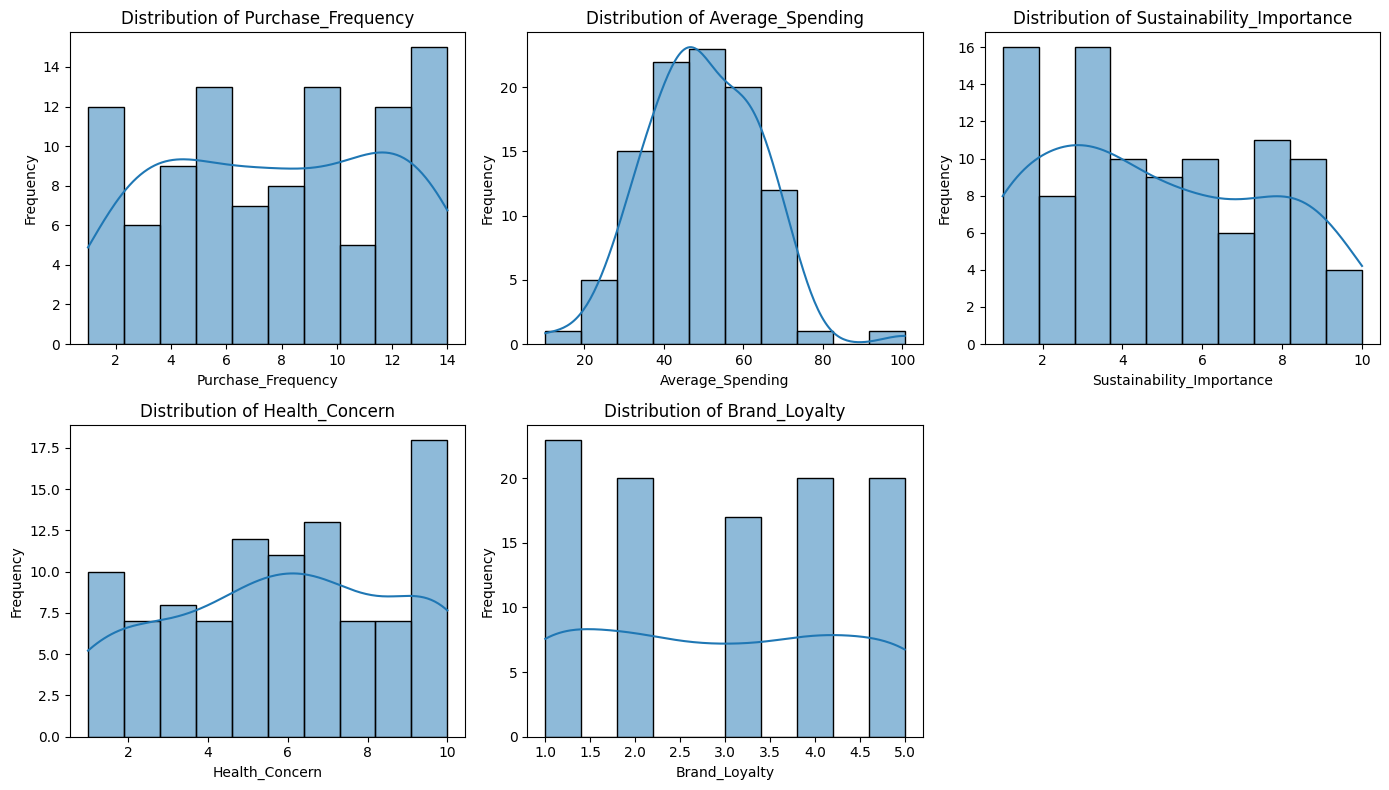

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variables you want to plot (modify if your DataFrame has different column names)
variables_to_plot = ['Purchase_Frequency', 'Average_Spending', 'Sustainability_Importance', 
                     'Health_Concern', 'Brand_Loyalty']

# 1. Distribution Plots for Each Variable
plt.figure(figsize=(14, 8))
for i, var in enumerate(variables_to_plot, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(mock_data[var], kde=True, bins=10)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



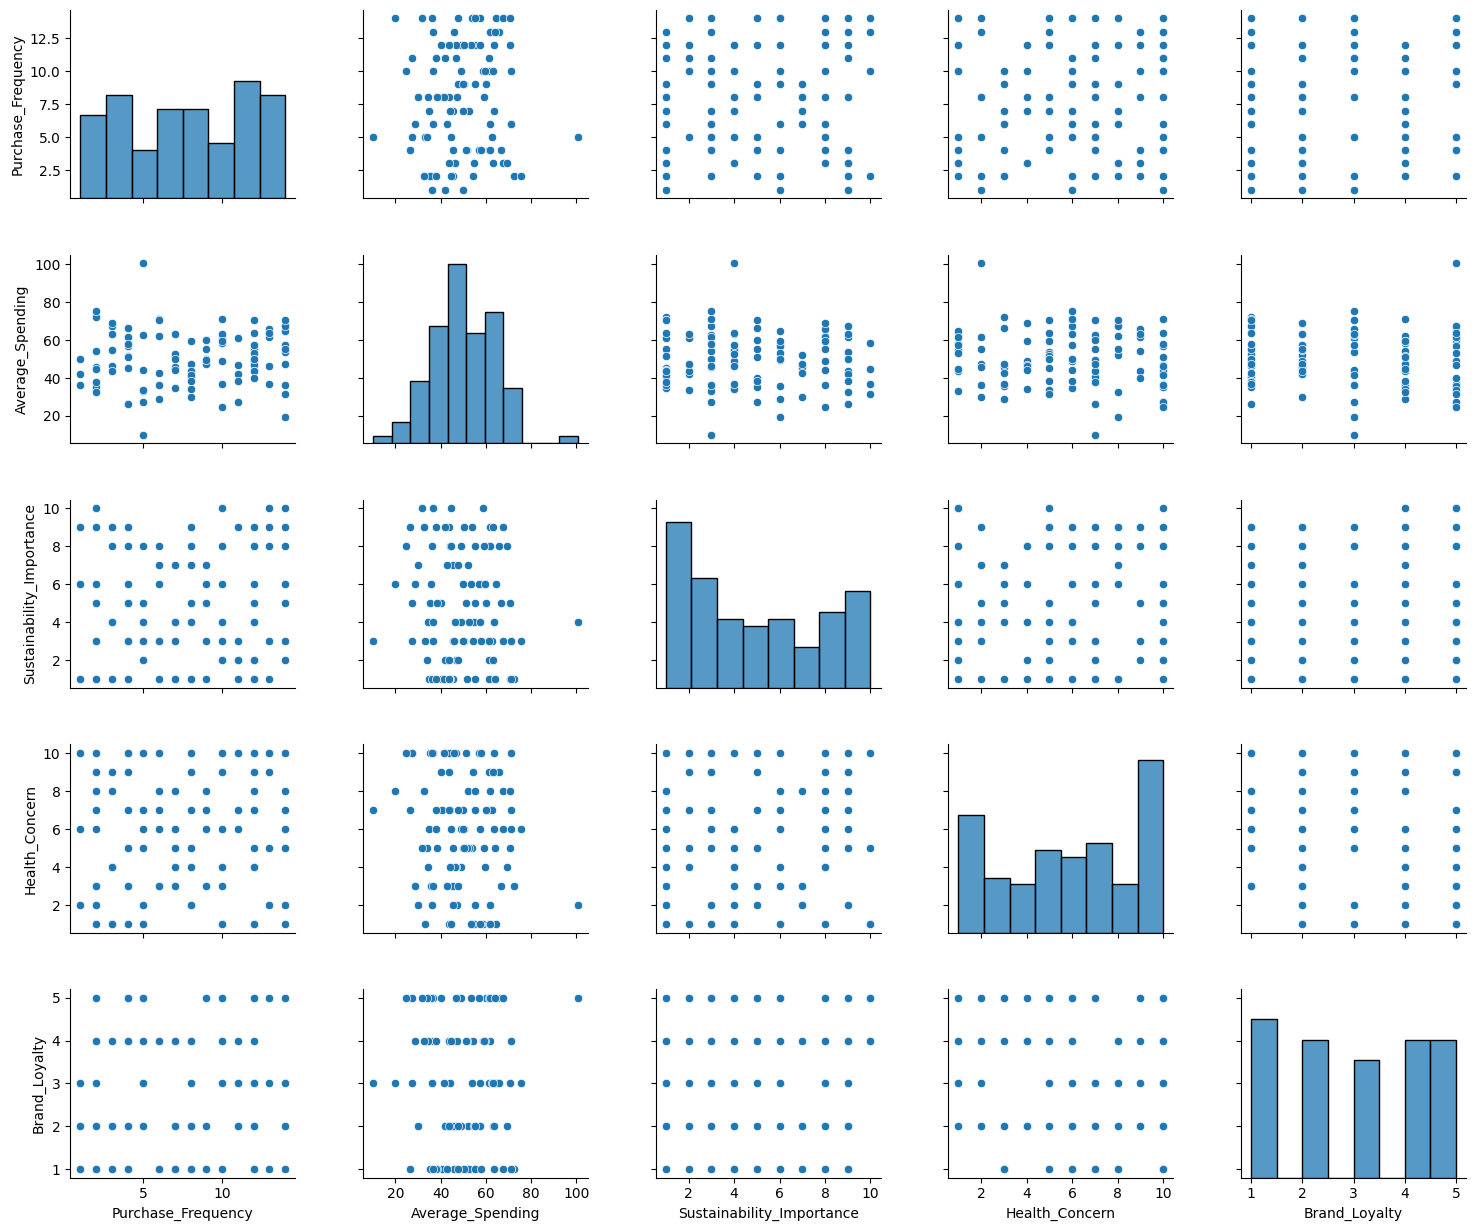

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the variables for the pair plot if necessary
variables_to_plot = ['Purchase_Frequency', 'Average_Spending', 'Sustainability_Importance', 
                     'Health_Concern', 'Brand_Loyalty']

# Create the pair plot with extra spacing
g = sns.pairplot(mock_data[variables_to_plot], corner=False, height=2.5, aspect=1.2)

# Adjust spacing between the plots
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # increase hspace and wspace as needed
plt.show()


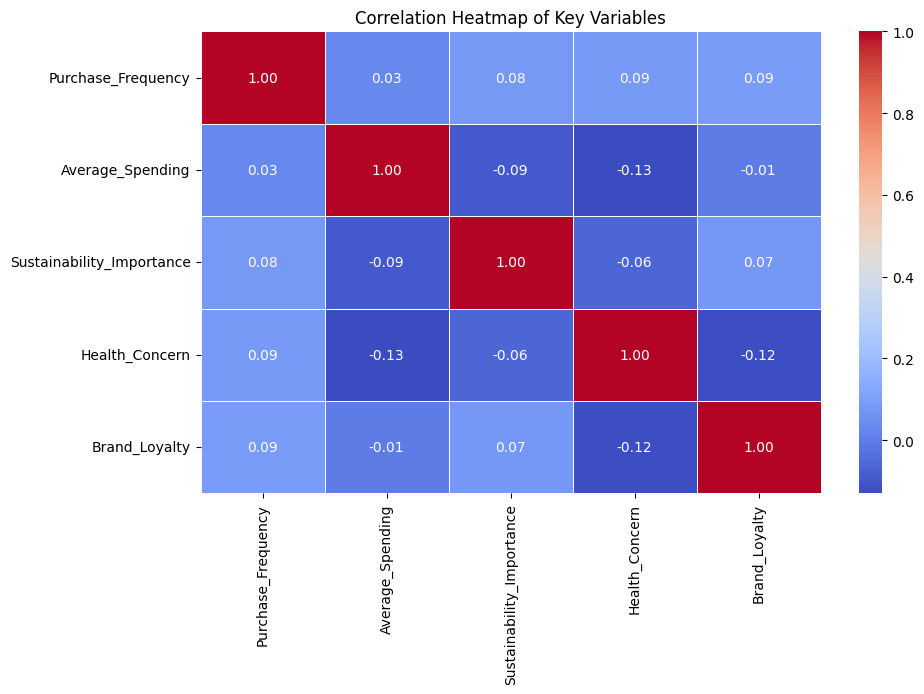

In [11]:
# Plotting the correlation heatmap again with annotations for better readability
plt.figure(figsize=(10, 6))
sns.heatmap(mock_data[variables_to_plot].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Variables")
plt.show()


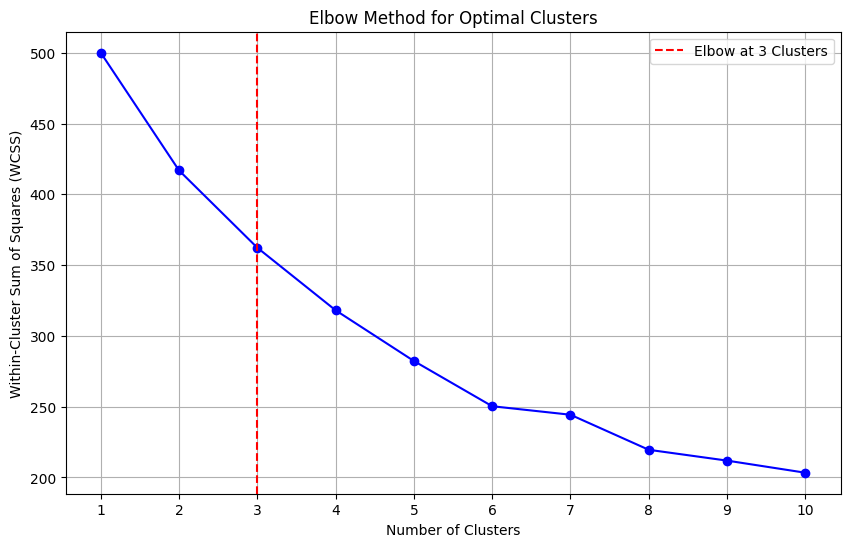

In [13]:
# Re-plotting the Elbow Method plot with a vertical line at the elbow point (3 clusters) for clarity
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.axvline(x=3, linestyle='--', color='r', label='Elbow at 3 Clusters')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Create DataFrame
mock_data = pd.DataFrame({
    'Customer_ID': range(1, num_customers + 1),
    'Purchase_Frequency': purchase_frequency,
    'Average_Spending': average_spending,
    'Sustainability_Importance': sustainability_importance,
    'Health_Concern': health_concern,
    'Brand_Loyalty': brand_loyalty,
    'Lifestyle': lifestyle_choices
})

# Dummy encode the Lifestyle column
mock_data = pd.get_dummies(mock_data, columns=['Lifestyle'])

# Selecting features for clustering
features = ['Purchase_Frequency', 'Average_Spending', 'Sustainability_Importance', 
            'Health_Concern', 'Brand_Loyalty']

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(mock_data[features])

# Apply K-means clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans_4.fit_predict(data_scaled)

# Add the cluster labels to the original DataFrame for analysis
mock_data['Cluster'] = cluster_labels

# Calculate the mean of each feature for each cluster
cluster_centers = mock_data.groupby('Cluster')[features].mean()

# Display the cluster centers for interpretation
print(cluster_centers)
print("================================================================")



         Purchase_Frequency  Average_Spending  Sustainability_Importance  \
Cluster                                                                    
0                 10.320000         45.505600                   3.720000   
1                 10.720000         58.935600                   6.000000   
2                  6.357143         49.547500                   6.321429   
3                  3.818182         44.879545                   2.954545   

         Health_Concern  Brand_Loyalty  
Cluster                                 
0              9.080000       3.040000  
1              3.920000       4.120000  
2              6.142857       1.500000  
3              4.318182       3.318182  


In [21]:
# Revised descriptions with qualitative labels (High, Moderate, Low) based on the average values

# Define thresholds for qualitative labeling
def qualitative_label(value, high_threshold, low_threshold):
    if value >= high_threshold:
        return "High"
    elif value <= low_threshold:
        return "Low"
    else:
        return "Moderate"

# Set thresholds for each feature to categorize as High, Moderate, or Low
thresholds = {
    'Purchase_Frequency': (9, 4),
    'Average_Spending': (60, 40),
    'Sustainability_Importance': (7, 4),
    'Health_Concern': (7, 4),
    'Brand_Loyalty': (4, 2)
}

# Generate updated descriptions with qualitative labels
cluster_descriptions = {}

for cluster, values in cluster_centers.iterrows():
    description = f"Cluster {cluster}:\n"
    for feature, (high_thresh, low_thresh) in thresholds.items():
        label = qualitative_label(values[feature], high_thresh, low_thresh)
        description += f"- {feature}: {values[feature]:.2f} ({label})\n"
    cluster_descriptions[cluster] = description

# Display the revised cluster descriptions
for desc in cluster_descriptions.values():
    print(desc)


Cluster 0:
- Purchase_Frequency: 10.32 (High)
- Average_Spending: 45.51 (Moderate)
- Sustainability_Importance: 3.72 (Low)
- Health_Concern: 9.08 (High)
- Brand_Loyalty: 3.04 (Moderate)

Cluster 1:
- Purchase_Frequency: 10.72 (High)
- Average_Spending: 58.94 (Moderate)
- Sustainability_Importance: 6.00 (Moderate)
- Health_Concern: 3.92 (Low)
- Brand_Loyalty: 4.12 (High)

Cluster 2:
- Purchase_Frequency: 6.36 (Moderate)
- Average_Spending: 49.55 (Moderate)
- Sustainability_Importance: 6.32 (Moderate)
- Health_Concern: 6.14 (Moderate)
- Brand_Loyalty: 1.50 (Low)

Cluster 3:
- Purchase_Frequency: 3.82 (Low)
- Average_Spending: 44.88 (Moderate)
- Sustainability_Importance: 2.95 (Low)
- Health_Concern: 4.32 (Moderate)
- Brand_Loyalty: 3.32 (Moderate)



In [26]:
# Recreate comparison_table from scratch as a numeric-only DataFrame
comparison_table = pd.DataFrame(columns=['Feature', 'Population Mean'] + [f'Segment {i+1}' for i in range(4)])

# Populate comparison_table with numeric data
for feature in features:
    segment_means = [mock_data[mock_data['Cluster'] == i][feature].mean() for i in range(4)]
    comparison_table = pd.concat([comparison_table, pd.DataFrame({
        'Feature': [feature],
        'Population Mean': [population_means[feature]],
        'Segment 1': [segment_means[0]],
        'Segment 2': [segment_means[1]],
        'Segment 3': [segment_means[2]],
        'Segment 4': [segment_means[3]]
    })], ignore_index=True)

# Create a display-only version of the table for formatted text output
comparison_display = comparison_table.copy()

# Perform ANOVA and apply formatting based on significance
for index, feature in enumerate(features):
    population_mean = population_means[feature]
    anova_result = f_oneway(*(mock_data[mock_data['Cluster'] == i][feature] for i in range(4)))
    is_significant = anova_result.pvalue < 0.05

    if is_significant:
        for i in range(4):  # For each segment
            segment_mean = comparison_table.loc[index, f'Segment {i+1}']
            # Apply formatted string to display table based on comparison
            if segment_mean > population_mean:
                comparison_display.loc[index, f'Segment {i+1}'] = f"**{segment_mean:.2f}** (higher)"
            elif segment_mean < population_mean:
                comparison_display.loc[index, f'Segment {i+1}'] = f"**{segment_mean:.2f}** (lower)"
            else:
                comparison_display.loc[index, f'Segment {i+1}'] = f"{segment_mean:.2f}"

# Display the final formatted comparison table
comparison_display


/tmp/ipykernel_7088/2808798130.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_table = pd.concat([comparison_table, pd.DataFrame({
/tmp/ipykernel_7088/2808798130.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '**10.32** (higher)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  comparison_display.loc[index, f'Segment {i+1}'] = f"**{segment_mean:.2f}** (higher)"
/tmp/ipykernel_7088/2808798130.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '**10.72** (higher)' has dtype incompatible with float64, please explicitly

,Feature,Population Mean,Segment 1,Segment 2,Segment 3,Segment 4
0,Purchase_Frequency,7.8800,**10.32** (higher),**10.72** (higher),**6.36** (lower),**3.82** (lower)
1,Average_Spending,49.8571,**45.51** (lower),**58.94** (higher),**49.55** (lower),**44.88** (lower)
2,Sustainability_Importance,4.8500,**3.72** (lower),**6.00** (higher),**6.32** (higher),**2.95** (lower)
3,Health_Concern,5.9200,**9.08** (higher),**3.92** (lower),**6.14** (higher),**4.32** (lower)
4,Brand_Loyalty,2.9400,**3.04** (higher),**4.12** (higher),**1.50** (lower),**3.32** (higher)


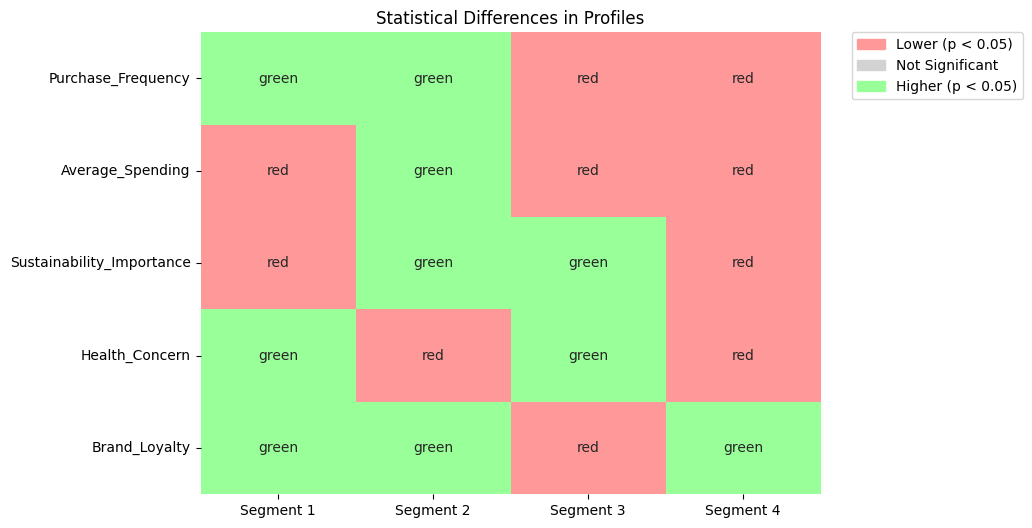

In [30]:
from scipy.stats import f_oneway

# Adjust color palette for lighter shades and add a legend to the heatmap

# Define custom color mapping
cmap = sns.color_palette(["#FF9999", "#D3D3D3", "#99FF99"])  # Light red, gray, light green

# Re-plotting the heatmap with adjusted colors and legend
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=heatmap_colors, fmt="", cmap=cmap, cbar=False,
            yticklabels=features, xticklabels=[f"Segment {i+1}" for i in range(4)])

# Adding a custom legend to explain colors
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color="#FF9999", label="Lower (p < 0.05)"),
    mpatches.Patch(color="#D3D3D3", label="Not Significant"),
    mpatches.Patch(color="#99FF99", label="Higher (p < 0.05)")
]
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title("Statistical Differences in Profiles")
plt.show()



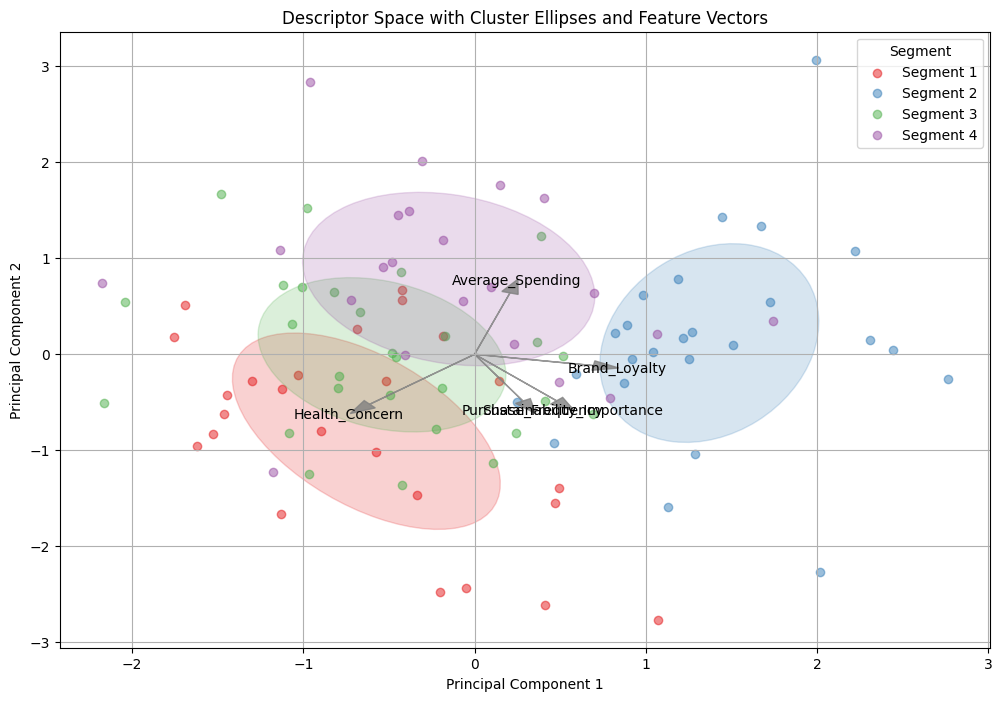

In [32]:
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as patches

# Scale the data before PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(mock_data[features])

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Create a new DataFrame for plotting purposes
pca_df = pd.DataFrame({
    'PCA1': pca_result[:, 0],
    'PCA2': pca_result[:, 1],
    'Cluster': cluster_labels
})

# Plot the data points with ellipses for each cluster
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = sns.color_palette("Set1", n_colors=4)

# Plot points and ellipses for each cluster
for i in range(4):  # Assuming 4 clusters
    cluster_data = pca_df[pca_df['Cluster'] == i]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Segment {i+1}', color=colors[i], alpha=0.5)

    # Fit an ellipse to each cluster
    cov = np.cov(cluster_data[['PCA1', 'PCA2']].values, rowvar=False)
    mean = cluster_data[['PCA1', 'PCA2']].mean().values
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    angle = np.arctan2(*eigenvectors[:, 0][::-1])
    width, height = 2 * np.sqrt(eigenvalues)
    ellipse = patches.Ellipse(mean, width, height, angle=np.degrees(angle), color=colors[i], alpha=0.2)
    plt.gca().add_patch(ellipse)

# Plot arrows for each feature
for i, feature in enumerate(features):
    vector = pca.components_[:, i] * np.sqrt(pca.explained_variance_)
    plt.arrow(0, 0, vector[0], vector[1], color='gray', alpha=0.8, head_width=0.1, head_length=0.15)
    plt.text(vector[0] * 1.2, vector[1] * 1.2, feature, color='black', ha='center', va='center')

# Add legend and labels
plt.title("Descriptor Space with Cluster Ellipses and Feature Vectors")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Segment")
plt.grid(True)
plt.show()


### 4. Cluster-Specific Insights

- **Segment 1 (Red)**: Positioned more toward the right and lower on the y-axis, indicating alignment with features on PC1 like **"Purchase Frequency"** and **"Average Spending."** This segment likely has higher values for these features but lower **"Sustainability Importance."**

- **Segment 2 (Blue)**: Positioned lower on both PC1 and PC2, close to **"Brand Loyalty"** and **"Health Concern."** This could suggest this segment values brand loyalty more than others and is lower in **"Average Spending."**

- **Segment 3 (Green)**: Positioned higher on PC2, aligning closely with **"Sustainability Importance"** and **"Health Concern,"** indicating that this segment likely has high values for these features.

- **Segment 4 (Purple)**: Positioned slightly right and center, showing a moderate relationship with **"Average Spending"** but potentially lower emphasis on **brand loyalty** and **health**.


## Marketing Plan Strategy

Based on the unique characteristics of each segment, here’s a targeted marketing plan tailored to their preferences and behaviors:

---

### Segment 1: **High-Frequency Spenders**
   - **Characteristics**: High **purchase frequency** and **average spending**, lower emphasis on **sustainability**.
   - **Marketing Strategy**:
     - **Loyalty Programs**: Introduce exclusive rewards for frequent purchases to increase loyalty.
     - **Discounts on Bulk Purchases**: Since they already spend more, offering discounts for buying in larger quantities could increase purchase size.
     - **Convenience-Based Messaging**: Highlight fast delivery, easy returns, and convenience-focused services, which may appeal more than eco-conscious messaging.

---

### Segment 2: **Brand Loyal, Health-Conscious Shoppers**
   - **Characteristics**: High **brand loyalty** and moderate **health concern**, but lower in spending and sustainability focus.
   - **Marketing Strategy**:
     - **Health-Focused Product Lines**: Promote health-oriented products, such as organic or clean-label items, which align with their health concern.
     - **Loyalty Benefits**: Strengthen loyalty through VIP access, points multipliers, or personalized discounts on repeat purchases.
     - **Education on Sustainability**: Since they’re not as sustainability-focused, introduce them to the brand’s sustainability efforts subtly, perhaps by highlighting how the health benefits align with eco-friendly practices.

---

### Segment 3: **Eco-Conscious, Health-Focused Buyers**
   - **Characteristics**: High emphasis on **sustainability** and **health concerns**, but moderate spending and brand loyalty.
   - **Marketing Strategy**:
     - **Sustainability Messaging**: Use eco-friendly messaging and highlight the environmental impact of products. Showcase certifications (e.g., organic, fair-trade).
     - **Health-Related Content**: Offer educational content that ties health benefits with sustainability (e.g., "how organic foods benefit your health and the planet").
     - **Cause-Based Marketing**: Engage this segment with campaigns that support environmental causes, like donating a portion of sales to sustainability initiatives.

---

### Segment 4: **Value-Seeking, Low-Loyalty Shoppers**
   - **Characteristics**: Low **brand loyalty** and **health concern**, but high **purchase frequency**.
   - **Marketing Strategy**:
     - **Value-Driven Promotions**: Offer deals, discounts, and limited-time promotions to appeal to their value-focused approach.
     - **Subscription or Bundling Options**: Encourage frequent purchases through subscription models or bundle deals that make them feel they’re getting more for less.
     - **Focus on Convenience and Variety**: Since loyalty is low, emphasize the convenience and variety of options to keep them engaged.

---

### General Strategies Across Segments

1. **Personalization**: Use data-driven personalization, targeting each segment with content that resonates most with their priorities (e.g., health, sustainability, or convenience).
2. **Cross-Selling Opportunities**: Recommend products aligned with each segment’s interests, such as eco-friendly add-ons for Segment 3 or bulk purchase options for Segment 1.
3. **Dynamic Campaigns**: Consider running dynamic ad campaigns that change messaging based on the segment, tailoring it to each group’s preferences.

---

By tailoring marketing messages to these distinct segments, the brand can maximize engagement and drive conversions. Each segment’s unique profile informs a marketing strategy that addresses their motivations, from loyalty rewards to value-driven promotions and cause-based marketing. This approach aligns closely with customer interests, enhancing the effectiveness of campaigns and building stronger connections with each group.
